# Convolutional Neural Networks

Realizaremos un ejercicio descrito en el blog www.aprendemachinelearning.com para hacer reconocimiento de imágenes.

# Importar Librerías

In [3]:
!python3 -m pip install numpy
!python3 -m pip install tensorflow
!python3 -m pip install scikit-learn
!python3 -m pip install matplotlib
!python3 -m pip install opencv-python


In [4]:
import numpy as np
import os
import re
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [5]:
import tensorflow.keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import Sequential,layers,models


# Cargar set de Imágenes

In [6]:
dirname = os.path.join(os.getcwd(), 'animales')
imgpath = dirname + os.sep 

images = []
directories = []
dircount = []
prevRoot=''
cant=0

print("leyendo imagenes de ",imgpath)

for root, dirnames, filenames in os.walk(imgpath):
    for filename in filenames:
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            cant=cant+1
            filepath = os.path.join(root, filename)
            image = plt.imread(filepath)
            images.append(image)
            b = "Leyendo..." + str(cant)
            print (b, end="\r")
            if prevRoot !=root:
                print(root, cant)
                prevRoot=root
                directories.append(root)
                dircount.append(cant)
                cant=0
dircount.append(cant)

dircount = dircount[1:]
dircount[0]=dircount[0]+1
print('Directorios leidos:',len(directories))
print("Imagenes en cada directorio", dircount)
print('suma Total de imagenes en subdirs:',sum(dircount))

leyendo imagenes de  /Users/angelinaquidiazgonzalezrivas/Documents/IA/animales/
/Users/angelinaquidiazgonzalezrivas/Documents/IA/animales/hurones 1
/Users/angelinaquidiazgonzalezrivas/Documents/IA/animales/puma 1828
/Users/angelinaquidiazgonzalezrivas/Documents/IA/animales/guacamayas 1760
/Users/angelinaquidiazgonzalezrivas/Documents/IA/animales/ajolote 1474
/Users/angelinaquidiazgonzalezrivas/Documents/IA/animales/oso_polar 1947
/Users/angelinaquidiazgonzalezrivas/Documents/IA/animales/tortuga 1151
Directorios leidos: 6
Imagenes en cada directorio [1829, 1760, 1474, 1947, 1151, 1711]
suma Total de imagenes en subdirs: 9872


# Creamos las etiquetas

In [7]:
labels=[]
indice=0
for cantidad in dircount:
    for i in range(cantidad):
        labels.append(indice)
    indice=indice+1
print("Cantidad etiquetas creadas: ",len(labels))

Cantidad etiquetas creadas:  9872


In [8]:
deportes=[]
indice=0
for directorio in directories:
    name = directorio.split(os.sep)
    print(indice , name[len(name)-1])
    deportes.append(name[len(name)-1])
    indice=indice+1

0 hurones
1 puma
2 guacamayas
3 ajolote
4 oso_polar
5 tortuga


In [9]:
y = np.array(labels)
import cv2
images_resized = [cv2.resize(img, (128, 128)) for img in images]  # Redimensionar a 128x128
X = np.array(images_resized, dtype=np.uint8)


# Find the unique numbers from the train labels
classes = np.unique(y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  6
Output classes :  [0 1 2 3 4 5]


# Creamos Sets de Entrenamiento y Test

In [10]:
train_X,test_X,train_Y,test_Y = train_test_split(X,y,test_size=0.2)
print('Training data shape : ', train_X.shape, train_Y.shape)
print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (7897, 128, 128, 3) (7897,)
Testing data shape :  (1975, 128, 128, 3) (1975,)


Text(0.5, 1.0, 'Ground Truth : 3')

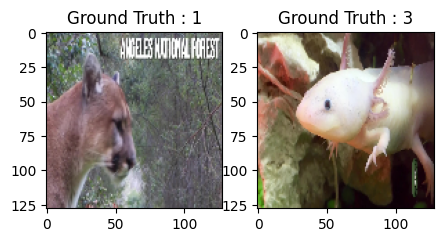

In [11]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

# Preprocesamos las imagenes

In [12]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255.
test_X = test_X / 255.

## Hacemos el One-hot Encoding para la red

In [13]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 1
After conversion to one-hot: [0. 1. 0. 0. 0. 0.]


# Creamos el Set de Entrenamiento y Validación

In [14]:
#Mezclar todo y crear los grupos de entrenamiento y testing
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

In [15]:
print(train_X.shape,valid_X.shape,train_label.shape,valid_label.shape)

(6317, 128, 128, 3) (1580, 128, 128, 3) (6317, 6) (1580, 6)


# Creamos el modelo de CNN

In [16]:
#declaramos variables con los parámetros de configuración de la red
INIT_LR = 1e-3 # Valor inicial de learning rate. El valor 1e-3 corresponde con 0.001
epochs = 6 # Cantidad de iteraciones completas al conjunto de imagenes de entrenamiento
batch_size = 64 # cantidad de imágenes que se toman a la vez en memoria

In [17]:
sport_model = Sequential()
sport_model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='linear', padding='same', input_shape=(128, 128, 3)))
sport_model.add(layers.LeakyReLU(alpha=0.1))
sport_model.add(layers.MaxPooling2D((2, 2),padding='same'))
sport_model.add(layers.Dropout(0.5))

sport_model.add(layers.Flatten())
sport_model.add(layers.Dense(32, activation='linear'))
sport_model.add(layers.LeakyReLU(alpha=0.1))
sport_model.add(layers.Dropout(0.5))
sport_model.add(layers.Dense(nClasses, activation='softmax'))

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [18]:
sport_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 131072)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │     4,194,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           198 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,195,430 (16.00 MB)

 Trainable params: 4,195,430 (16.00 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
print("Number of images:", len(images))
print("Number of labels:", len(labels))


Number of images: 9872
Number of labels: 9872


In [24]:
from tensorflow.keras.utils import to_categorical

# Convertir etiquetas a one-hot encoding
train_label = to_categorical(train_label, num_classes=6)
valid_label = to_categorical(valid_label, num_classes=6)
print("train_label shape after one-hot encoding:", train_label.shape)  # (6317, 6)
print("valid_label shape after one-hot encoding:", valid_label.shape)  # (1580, 6)
sport_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = sport_model.fit(
    train_X, train_label,
    epochs=10,
    validation_data=(test_X, valid_label)
)


train_label shape after one-hot encoding: (6317, 6)
valid_label shape after one-hot encoding: (1580, 6)
Epoch 1/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 16s 79ms/step - accuracy: 0.9749 - loss: 5.0848 - val_accuracy: 0.1804 - val_loss: 2166.2119
Epoch 2/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 15s 77ms/step - accuracy: 0.9810 - loss: 3.8354 - val_accuracy: 0.1804 - val_loss: 3196.0212
Epoch 3/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 15s 76ms/step - accuracy: 0.9878 - loss: 2.3775 - val_accuracy: 0.1804 - val_loss: 3115.1541
Epoch 4/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 15s 78ms/step - accuracy: 0.9915 - loss: 1.2267 - val_accuracy: 0.1804 - val_loss: 3128.5984
Epoch 5/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 16s 79ms/step - accuracy: 0.9902 - loss: 1.7551 - val_accuracy: 0.1804 - val_loss: 3407.3833
Epoch 6/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 16s 80ms/step - accuracy: 0.9926 - loss: 1.4204 - val_accuracy: 0.1804 - val_loss: 3626.6382
Epoch 7/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 16s 81ms/step - accuracy: 0.9905 - loss: 1.1770 - val_accu

In [25]:

sport_model.compile(loss=tensorflow.keras.losses.categorical_crossentropy, optimizer=tensorflow.keras.optimizers.Adagrad(INIT_LR, INIT_LR / 100),metrics=['accuracy'])

# Entrenamos el modelo: Aprende a clasificar imágenes

In [26]:
# este paso puede tomar varios minutos, dependiendo de tu ordenador, cpu y memoria ram libre
# como ejemplo, en mi Macbook pro tarda 4 minutos
sport_train = sport_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Epoch 1/6
99/99 ━━━━━━━━━━━━━━━━━━━━ 16s 155ms/step - accuracy: 0.9979 - loss: 0.5988 - val_accuracy: 0.9994 - val_loss: 4.4577
Epoch 2/6
99/99 ━━━━━━━━━━━━━━━━━━━━ 15s 152ms/step - accuracy: 0.9990 - loss: 0.1744 - val_accuracy: 0.9994 - val_loss: 4.4141
Epoch 3/6
99/99 ━━━━━━━━━━━━━━━━━━━━ 15s 153ms/step - accuracy: 0.9978 - loss: 0.4605 - val_accuracy: 0.9994 - val_loss: 4.3863
Epoch 4/6
99/99 ━━━━━━━━━━━━━━━━━━━━ 16s 166ms/step - accuracy: 0.9985 - loss: 0.1086 - val_accuracy: 0.9994 - val_loss: 4.4783
Epoch 5/6
99/99 ━━━━━━━━━━━━━━━━━━━━ 16s 162ms/step - accuracy: 0.9973 - loss: 0.2078 - val_accuracy: 0.9994 - val_loss: 4.4512
Epoch 6/6
99/99 ━━━━━━━━━━━━━━━━━━━━ 17s 169ms/step - accuracy: 0.9969 - loss: 0.5955 - val_accuracy: 0.9994 - val_loss: 4.3578


In [29]:
# guardamos la red, para reutilizarla en el futuro, sin tener que volver a entrenar
sport_model.save("sports_mnist.keras")

# Evaluamos la red

In [31]:
# Sincronizar test_X y test_Y_one_hot
min_samples = min(test_X.shape[0], test_Y_one_hot.shape[0])
test_X = test_X[:min_samples]
test_Y_one_hot = test_Y_one_hot[:min_samples]

# Confirmar dimensiones
print("test_X shape:", test_X.shape)
print("test_Y_one_hot shape:", test_Y_one_hot.shape)

# Evaluar el modelo
test_eval = sport_model.evaluate(test_X, test_Y_one_hot, verbose=1)
print("Test evaluation:", test_eval)

test_eval = sport_model.evaluate(test_X, test_Y_one_hot, verbose=1)

test_X shape: (1580, 128, 128, 3)
test_Y_one_hot shape: (1580, 6)
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.1646 - loss: 4399.5376
Test evaluation: [4498.58544921875, 0.149367094039917]
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.1646 - loss: 4399.5376


In [32]:
print('Pérdida(Prueba):', test_eval[0])
print('Precisión(Prueba):', test_eval[1])

Pérdida(Prueba): 4498.58544921875
Precisión(Prueba): 0.149367094039917


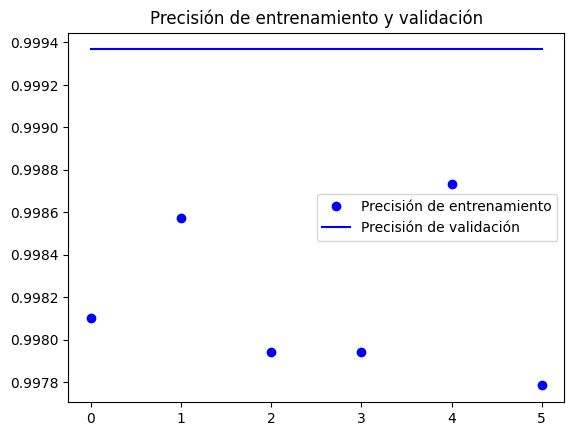

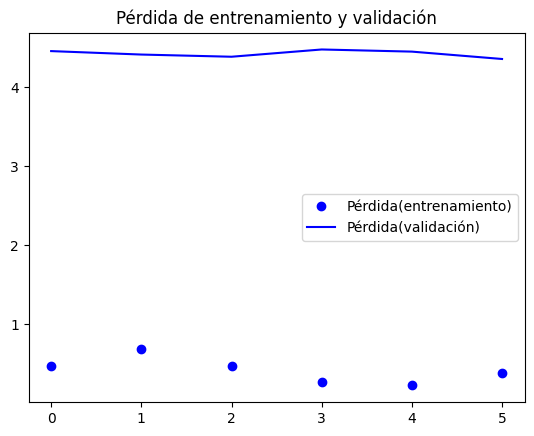

In [33]:
accuracy = sport_train.history['accuracy']
val_accuracy = sport_train.history['val_accuracy']
loss = sport_train.history['loss']
val_loss = sport_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Precisión de entrenamiento')
plt.plot(epochs, val_accuracy, 'b', label='Precisión de validación')
plt.title('Precisión de entrenamiento y validación')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Pérdida(entrenamiento)')
plt.plot(epochs, val_loss, 'b', label='Pérdida(validación)')
plt.title('Pérdida de entrenamiento y validación')
plt.legend()
plt.show()

In [34]:
predicted_classes2 = sport_model.predict(test_X)

50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step


In [35]:
predicted_classes=[]
for predicted_sport in predicted_classes2:
    predicted_classes.append(predicted_sport.tolist().index(max(predicted_sport)))
predicted_classes=np.array(predicted_classes)

In [36]:
predicted_classes.shape, test_Y.shape

((1580,), (1975,))

# Aprendamos de los errores: Qué mejorar

correct: [   0    1    2 ... 1577 1578 1579]


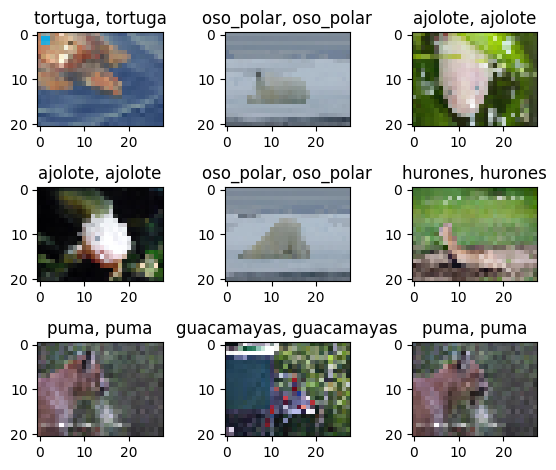

In [ ]:
# Sincronizar test_X y test_Y
min_samples = min(test_X.shape[0], test_Y.shape[0])
test_X = test_X[:min_samples]
test_Y = test_Y[:min_samples]

# Calcular índices correctos
correct = np.where(predicted_classes == test_Y)[0]
print("correct:", correct)

import cv2
import matplotlib.pyplot as plt

# Mostrar las primeras imágenes correctamente clasificadas
for i, correct_idx in enumerate(correct[:9]):  
    plt.subplot(3, 3, i + 1)
    resized_image = cv2.resize(test_X[correct_idx], (28, 21))  # Ajustar tamaño
    plt.imshow(resized_image, cmap='gray', interpolation='none')
    plt.title("{}, {}".format(deportes[predicted_classes[correct_idx]],
                              deportes[test_Y[correct_idx]]))
    plt.tight_layout()


incorrect: [572]


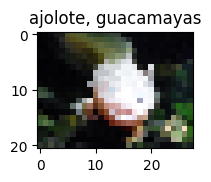

In [57]:
# Sincronizar test_X y test_Y
min_samples = min(test_X.shape[0], test_Y.shape[0])
test_X = test_X[:min_samples]
test_Y = test_Y[:min_samples]

# Calcular índices correctos
incorrect = np.where(predicted_classes != test_Y)[0]
print("incorrect:", incorrect)

import cv2
import matplotlib.pyplot as plt

# Mostrar las primeras imágenes incorrectamente clasificadas
for i, incorrect_idx in enumerate(incorrect[:9]):  
    plt.subplot(3, 3, i + 1)
    resized_image = cv2.resize(test_X[incorrect_idx], (28, 21))  # Ajustar tamaño
    plt.imshow(resized_image, cmap='gray', interpolation='none')
    plt.title("{}, {}".format(deportes[predicted_classes[incorrect_idx]],
                              deportes[test_Y[incorrect_idx]]))
    plt.tight_layout()


In [58]:
target_names = ["Clase {}".format(i) for i in range(nClasses)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Clase 0       1.00      1.00      1.00       307
     Clase 1       1.00      1.00      1.00       285
     Clase 2       1.00      1.00      1.00       238
     Clase 3       1.00      1.00      1.00       288
     Clase 4       1.00      1.00      1.00       187
     Clase 5       1.00      1.00      1.00       275

    accuracy                           1.00      1580
   macro avg       1.00      1.00      1.00      1580
weighted avg       1.00      1.00      1.00      1580



# Prediccion de una nueva imagen

In [70]:
!python3 -m pip install scikit-image
from skimage.transform import resize

images=[]
# AQUI ESPECIFICAMOS UNAS IMAGENES
filenames = ['test/huron.webp']

for filepath in filenames:
    image = plt.imread(filepath,0)
    image_resized = resize(image, (21, 28),anti_aliasing=True,clip=False,preserve_range=True)
    images.append(image_resized)

X = np.array(images, dtype=np.uint8) #convierto de lista a numpy
test_X = X.astype('float32')
test_X = test_X / 255.

predicted_classes = sport_model.predict(test_X)

for i, img_tagged in enumerate(predicted_classes):
    print(filenames[i], deportes[img_tagged.tolist().index(max(img_tagged))])

FileNotFoundError: [Errno 2] No such file or directory: '/Users/angelinaquidiazgonzalezrivas/Documents/IA/test/huron.webp'